## Dictionary class

In [6]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import json
%matplotlib qt 

from thothsnehet.dictionary_analyzer import DictionaryAnalyzer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dictionary_analyzer = DictionaryAnalyzer()
dictionary_analyzer.add_selected_words()
G = dictionary_analyzer.G

In [10]:
dictionary_analyzer.valid_words

AttributeError: 'DictionaryAnalyzer' object has no attribute 'valid_words'

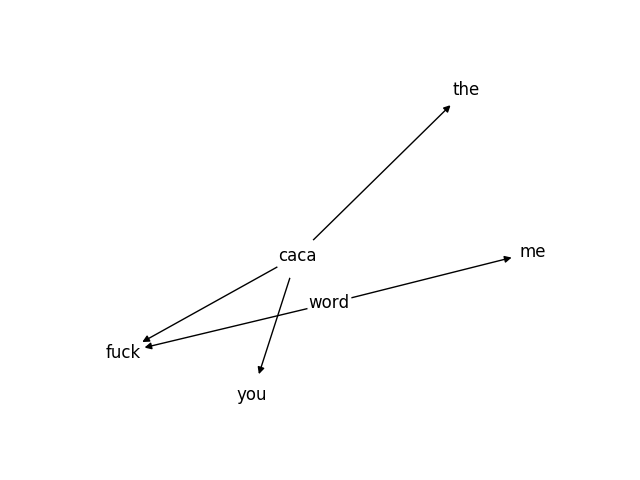

In [11]:
folder_images = "./"
image_name = "cycle_graph.png"; img_path = folder_images + image_name
size_inches = [7, 3]; 
plt.figure()
axes = plt.subplot2grid((1,1),(0,0))

nx.draw(G, with_labels = True, node_size = 1000, node_color = "w")
#edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))

plt.savefig(img_path, dpi = 100, size_inches = size_inches)
plt.close()
Image(img_path)

In [23]:
list(G.predecessors("the"))
# list(G.successors("caca"))

['caca']

In [3]:
from thothsnehet.dictionary_crawlers import DictionaryCrawler
from thothsnehet.subprocess import call_subprocess

In [4]:
dictionary_crawler = DictionaryCrawler()

/home/montoya/Desktop/VScode/thoths-nehet/thothsnehet/dictionary_crawler/dictionary_crawler/spiders/


In [6]:
import scrapy
from thothsnehet.dictionary_crawler.dictionary_crawler.spiders import OxfordCrawler
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess()

words = ["You", "are"]
start_urls = ["https://www.lexico.com/en/definition/" + word for word in words]
process.crawl(OxfordCrawler, start_urls=start_urls)
process.start()

2020-04-07 16:15:22 [scrapy.utils.log] INFO: Scrapy 2.0.1 started (bot: scrapybot)
2020-04-07 16:15:22 [scrapy.utils.log] INFO: Versions: lxml 4.4.2.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.4 (default, Aug 13 2019, 20:35:49) - [GCC 7.3.0], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Linux-5.3.0-40-generic-x86_64-with-debian-buster-sid
2020-04-07 16:15:22 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-04-07 16:15:22 [scrapy.crawler] INFO: Overridden settings:
{}
2020-04-07 16:15:22 [scrapy.extensions.telnet] INFO: Telnet Password: c518ba0658a4330a
2020-04-07 16:15:22 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-04-07 16:15:22 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.down

In [ ]:
dictionary_crawler.get_definitions(["Hello"])

In [ ]:
cwd = os.getcwd()
os.chdir(dictionary_crawler.crawlers_path)
call_subprocess(cmd = f"scrapy crawl oxford -o oxford.jl")
os.chdir(cwd)
os.getcwd()

In [ ]:
file_path = dictionary_crawler.crawlers_path + "oxford.jl"
with open(file_path) as f:
    for line in f:
        j_content = json.loads(line)
        print (j_content)